In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('loan-data\Anonymize_Loan_Default_data.csv', encoding= 'ISO-8859-1')

In [3]:
## Data Exploration

In [4]:
headers = []
for col in df.columns:
    headers.append(col)
    

print(headers)
df = df.dropna(subset=['int_rate'])
df = df.loc[(df['int_rate']!=0)]

['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'repay_fail']


In [5]:
default_count = df['repay_fail'].value_counts()[1]
no_default_count = df['repay_fail'].value_counts()[0]
print("Default Count: %d No default count: %d " % (default_count, no_default_count))

purpose_counts = df['purpose'].value_counts()

print("--Reasons for loan--")
print(purpose_counts)

Default Count: 5828 No default count: 32651 
--Reasons for loan--
debt_consolidation    17917
credit_card            4974
other                  3950
home_improvement       2901
major_purchase         2078
small_business         1808
car                    1481
wedding                 909
medical                 675
moving                  562
house                   387
educational             386
vacation                360
renewable_energy         91
Name: purpose, dtype: int64


2        15.95
4         5.42
7         7.49
8        14.27
9        23.22
         ...  
38472    15.05
38474     9.62
38477    14.96
38478    16.89
38479    13.49
Name: int_rate, Length: 17917, dtype: float64


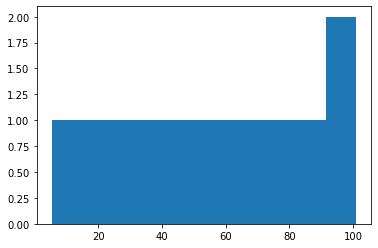

ValueError: shape mismatch: objects cannot be broadcast to a single shape

In [13]:
credit_interest_rates = df[df['purpose'] == "credit_card"]
debt_consolodation_interest_rates = df[df['purpose'] == "debt_consolidation"]

#TODO generate some histograms